# Efficient Frontier

## Stock Valuation

Part 1: Performance Measurement

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors, all expressed as a percentage. These observations cover the ten-year period from Jan 2004 through Dec 2013.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

Sharpe ratio
Sortino ratio (using risk-free rate as target)
Treynor ratio (using CAPM β)
Jensen's α
Three-factor α
The sample semi-variance can be estimated as:
1120∑t=1120min{Rit−Rft,0}2
 where Ri is return on industry portfolio and Rf is risk-free rate

Create a table showing the performance metrics for the ten industry portfolios. Also plot your results as a bar chart for each performance metric. Briefly explain the economic significance of each performance metric.

Part 2: Minimum-Variance Frontier Revisited

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. 

Without short sales, portfolio weights will be limited to the range [0, 1]. Randomly draw each element of w, the vector of portfolio weights, from the uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one.

Use the normalized w to calculate the mean return and standard deviation of return. Repeat this process until you have at least 105 observations. Plot the points with mean return on the vertical axis and standard deviation of return on the horizontal axis to show the minimum-variance frontier.

Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight . Plot your results to show the minimum-variance frontier on a separate graph.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

> Sharpe ratio

> Sortino ratio (using risk-free rate as target)

> Treynor ratio (using CAPM β)

> Jensen's α

> Three-factor α

In [2]:
data_idt = pd.read_excel('Industry_Portfolios.xlsx', index_col=0, header=0)
data_mkt = pd.read_excel('Market_Portfolio.xlsx', index_col=0, header=0)
data_risk = pd.read_excel('Risk_Factors.xlsx', index_col=0, header=0)

'''---Part 1---'''
#Sharp ratio
Rf = data_risk[['Rf']]
Rf.columns = [data_idt.columns[0]]
for i in range(1,len(data_idt.columns)):
    Rf.insert(i,data_idt.columns[i],Rf[[data_idt.columns[0]]])
Risk_premium = data_idt - Rf
Mean_Risk_premium = Risk_premium.mean()
Var_Risk_premium = Risk_premium.var()
Std_Risk_premium = Risk_premium.std()
Sharp_ratio = pd.DataFrame(Mean_Risk_premium/Std_Risk_premium,index=data_idt.columns.T,columns=['Sharp ratio'])
print(Sharp_ratio)

       Sharp ratio
NoDur     0.231099
Durbl     0.072356
Manuf     0.166616
Enrgy     0.181708
HiTec     0.118552
Telcm     0.169064
Shops     0.191753
Hlth      0.172529
Utils     0.210948
Other     0.064693


In [3]:
#Sortino ratio
Rf_1 = Rf.copy()
for i in range(0,len(data_idt.index)):
    for j in range(0,len(data_idt.columns)):
        if data_idt.iloc[i,j] >= Rf_1.iloc[i,j]:
            Rf_1.iloc[i,j] = np.nan
Risk_premium_d = data_idt - Rf_1
Semivar_Risk_premium = (Risk_premium_d**2).sum()/len(Risk_premium_d)
Sortino_ratio = pd.DataFrame(Mean_Risk_premium/np.sqrt(Semivar_Risk_premium),index=data_idt.columns.T,columns=['Sortino ratio'])
print(Sortino_ratio)

       Sortino ratio
NoDur       0.350804
Durbl       0.111967
Manuf       0.241260
Enrgy       0.273612
HiTec       0.170620
Telcm       0.244940
Shops       0.293032
Hlth        0.270294
Utils       0.290044
Other       0.087351


In [4]:
#Jensen's alpha
Market_Risk_premium = data_risk[['Rm-Rf']]
regression_mm = LinearRegression().fit(Market_Risk_premium,Risk_premium)
Jensen_alpha = pd.DataFrame(regression_mm.intercept_,index=data_idt.columns.T,columns=['Jensen\'s alpha'])
print(Jensen_alpha)

       Jensen's alpha
NoDur        0.369717
Durbl       -0.417903
Manuf        0.160494
Enrgy        0.504485
HiTec       -0.064024
Telcm        0.194348
Shops        0.274093
Hlth         0.236968
Utils        0.446523
Other       -0.387508


In [6]:
type(Market_Risk_premium)

pandas.core.frame.DataFrame

In [7]:
#Treynor ratio(using CAPM beta)
beta = pd.DataFrame(regression_mm.coef_,index=data_idt.columns.T,columns=['Beta'])
mean_Risk_premium = Risk_premium.mean()
Treynor_ratio=pd.DataFrame(mean_Risk_premium/beta.iloc[:,0],index=data_idt.columns.T,columns=['Treynor ratio'])
print(Treynor_ratio)

       Treynor ratio
NoDur       1.186372
Durbl       0.367463
Manuf       0.758251
Enrgy       1.143330
HiTec       0.564295
Telcm       0.836363
Shops       0.951258
Hlth        0.971435
Utils       1.452334
Other       0.299781


In [8]:
Risk_premium

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [9]:
#Three-factor alpha
Dependent_factors = data_risk[['Rm-Rf','SMB','HML']]
regression_tfm = LinearRegression().fit(Dependent_factors,Risk_premium)
Three_factor_alpha = pd.DataFrame(regression_tfm.intercept_,index=data_idt.columns.T,columns=['Three-factor alpha'])
print(Three_factor_alpha)

       Three-factor alpha
NoDur            0.386704
Durbl           -0.474342
Manuf            0.153285
Enrgy            0.523007
HiTec           -0.065979
Telcm            0.200724
Shops            0.255941
Hlth             0.257472
Utils            0.474411
Other           -0.404412


       Sharp ratio  Sortino ratio  Treynor ratio  Jensen's alpha  \
NoDur     0.231099       0.350804       1.186372        0.369717   
Durbl     0.072356       0.111967       0.367463       -0.417903   
Manuf     0.166616       0.241260       0.758251        0.160494   
Enrgy     0.181708       0.273612       1.143330        0.504485   
HiTec     0.118552       0.170620       0.564295       -0.064024   
Telcm     0.169064       0.244940       0.836363        0.194348   
Shops     0.191753       0.293032       0.951258        0.274093   
Hlth      0.172529       0.270294       0.971435        0.236968   
Utils     0.210948       0.290044       1.452334        0.446523   
Other     0.064693       0.087351       0.299781       -0.387508   

       Three-factor alpha  
NoDur            0.386704  
Durbl           -0.474342  
Manuf            0.153285  
Enrgy            0.523007  
HiTec           -0.065979  
Telcm            0.200724  
Shops            0.255941  
Hlth             0.257472  

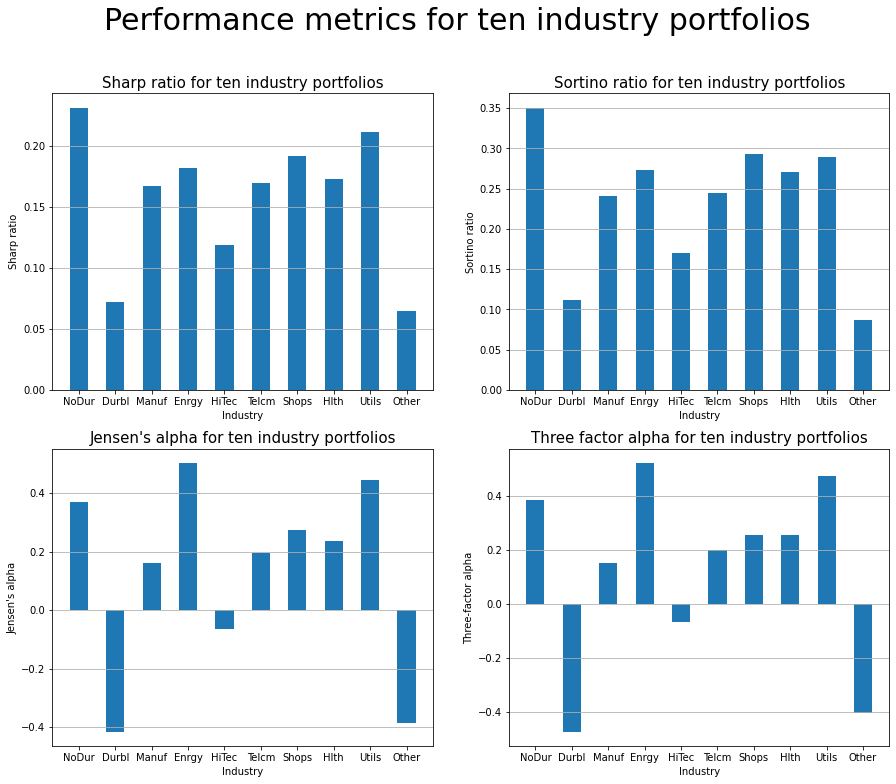

In [11]:
#Performance metrics for the ten industry portfolios
Performance_metrics = pd.concat([Sharp_ratio.T,Sortino_ratio.T,Treynor_ratio.T,Jensen_alpha.T,Three_factor_alpha.T]).T
print(Performance_metrics)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=[15,12])
fig.suptitle('Performance metrics for ten industry portfolios',fontsize=30)
ax1.bar(Sharp_ratio.index,Sharp_ratio['Sharp ratio'],0.5)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Sharp ratio')
ax2.bar(Sortino_ratio.index,Sortino_ratio['Sortino ratio'],0.5)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Sortino ratio')
ax3.bar(Jensen_alpha.index,Jensen_alpha['Jensen\'s alpha'],0.5)
ax3.set_xlabel('Industry')
ax3.set_ylabel('Jensen\'s alpha')
ax4.bar(Three_factor_alpha.index,Three_factor_alpha['Three-factor alpha'],0.5)
ax4.set_xlabel('Industry')
ax4.set_ylabel('Three-factor alpha')
ax1.set_title('Sharp ratio for ten industry portfolios',fontsize=15)
ax2.set_title('Sortino ratio for ten industry portfolios',fontsize=15)
ax3.set_title('Jensen\'s alpha for ten industry portfolios',fontsize=15)
ax4.set_title('Three factor alpha for ten industry portfolios',fontsize=15)
ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')
ax4.grid(axis='y')


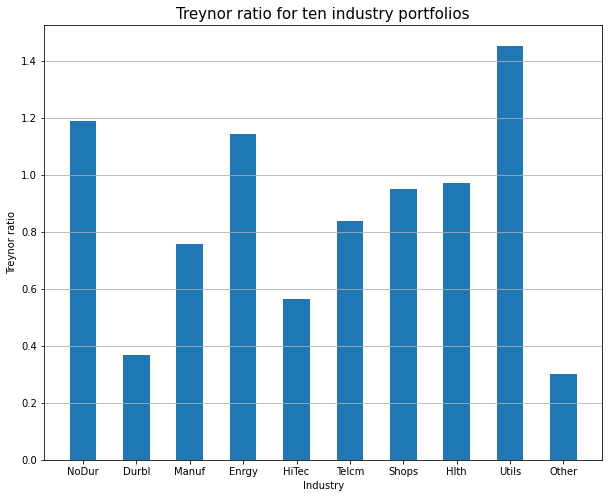

In [12]:
plt.figure(figsize=[10,8])
plt.bar(Treynor_ratio.index,Treynor_ratio['Treynor ratio'],0.5)
plt.xlabel('Industry')
plt.ylabel('Treynor ratio')
plt.title('Treynor ratio for ten industry portfolios',fontsize=15)
plt.grid(axis='y')

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. 

Without short sales, portfolio weights will be limited to the range [0, 1]. Randomly draw each element of w, the vector of portfolio weights, from the uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one.

Use the normalized w to calculate the mean return and standard deviation of return. Repeat this process until you have at least 105 observations. Plot the points with mean return on the vertical axis and standard deviation of return on the horizontal axis to show the minimum-variance frontier.

In [13]:
'''---Part 2---'''
#Monte Carlo simulation for minimum variance frontier    
num_p = 100000
all_weights = np.zeros((num_p,len(data_idt.columns)))
Rt_portfolio = np.zeros(num_p)
Std_portfolio = np.zeros(num_p)
for i in range(num_p):
    weights = np.random.uniform(0,1,len(data_idt.columns))
    weights = weights/np.sum(weights)
    all_weights[i,:] = weights
    Rt_portfolio[i] = np.sum(data_idt.mean()*weights)
    Std_portfolio[i] = np.sqrt(np.dot(weights.T,np.dot(data_idt.cov(),weights)))

Text(0, 0.5, 'Portfolio Return (%)')

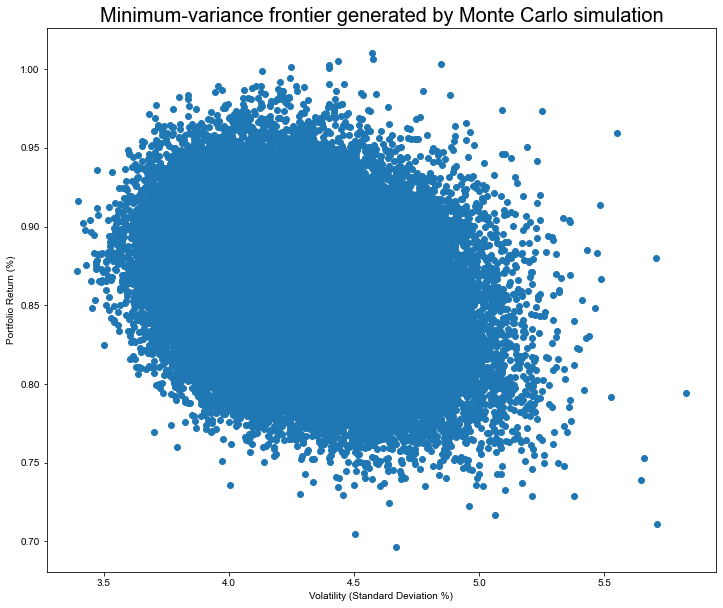

In [14]:
fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(Std_portfolio,Rt_portfolio)

plt.style.use('seaborn-dark')
plt.title('Minimum-variance frontier generated by Monte Carlo simulation',fontsize=20)
plt.xlabel('Volatility (Standard Deviation %)')
plt.ylabel('Portfolio Return (%)')

Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight . Plot your results to show the minimum-variance frontier on a separate graph.

In [15]:
#use 1/w instead of w
for i in range(num_p):
    weights = np.random.uniform(0,1,len(data_idt.columns))
    weights = weights/np.sum(weights)
    weights_1 = 1/weights
    weights_1 = weights_1/np.sum(weights_1)
    all_weights[i,:] = weights_1
    Rt_portfolio[i] = np.sum(data_idt.mean()*weights_1)
    Std_portfolio[i] = np.sqrt(np.dot(weights_1.T,np.dot(data_idt.cov(),weights_1)))


Text(0, 0.5, 'Portfolio Return (%)')

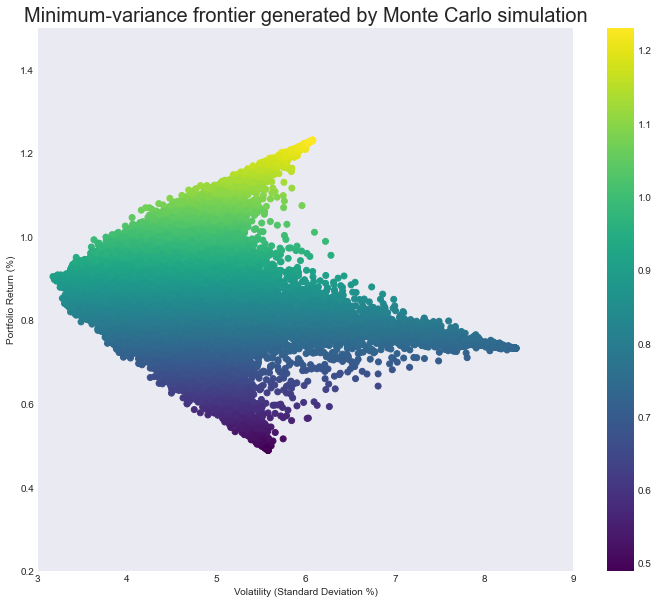

In [16]:
fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(Std_portfolio,Rt_portfolio,c=Rt_portfolio,cmap='viridis')
ax.set_xlim(0,10)
ax.set_ylim(0,2)
plt.title('Minimum-variance frontier generated by Monte Carlo simulation',fontsize=20)
plt.colorbar()
ax.set_xlim(3,9)
ax.set_ylim(0.2,1.5)
plt.xlabel('Volatility (Standard Deviation %)')
plt.ylabel('Portfolio Return (%)')

Economic significance:

Sharpe ratio represents risk premium per unit of total risk:
Includes all types of systematic risk and also idiosyncratic risk, which penalises individual investments and non-diversified portfolios
Implicitly assumes normal returns, so cannot distinguish between return distributions with same variance but different skewness or kurtosis

Treynor ratio represents risk premium per unit of market risk, which ignores other types of systematic risk

Sortino ratio represents risk premium per unit of downside risk, so can distinguish between asymmetric return distributions with same variance but different skewness

Jensen's α represents pricing error (or abnormal mean return) after adjusting for exposure to market risk

Three-factor α represents pricing error (or abnormal mean return) after adjusting for exposure to market risk, size risk, and value risk